Follow these:
* https://medium.com/datactw/imdb-dataset-visualization-data-analytics-using-pandas-97b5c6f03c6d

In [1]:
%%bash
pip install -q --upgrade pip
pip install -q pandas==0.23.0
pip install -q numpy==1.14.3
pip install -q matplotlib==3.0.3
pip install -q seaborn==0.8.1
pip install -q PyAthena==1.8.0

In [2]:
# Imports & Settings

import boto3
import sagemaker

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Get region 
session = boto3.session.Session()
region_name = session.region_name

# Get SageMaker session & default S3 bucket
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()

# Set Athena database & table 
database_name = 'dsoaws'
table_name = 'amazon_reviews_parquet'

In [3]:
# PyAthena imports
from pyathena import connect
from pyathena.pandas_cursor import PandasCursor
from pyathena.util import as_pandas

7. TODO:  What is the correlation between the number of reviews and the average rating for each product?  (Answer:  0.029)
```
SELECT product_id, COUNT(*) AS count_reviews, AVG(star_rating) AS avg_star_rating
FROM {}.{} 
TABLESAMPLE BERNOULLI(10)
GROUP BY product_id
LIMIT 1000
```
8. TODO:  What is the correlation between the number of helpful votes and the rating for each review?  (-0.00926)
```
SELECT helpful_votes, star_rating
FROM {}.{}
TABLESAMPLE BERNOULLI(10)
LIMIT 1000
```
9. TODO:  What is the correlation between the length of a review and the rating for each review? (-0.1662)
```
SELECT product_id, LENGTH(review_body) as length_review_body, star_rating
FROM {}.{}
TABLESAMPLE BERNOULLI(10)
LIMIT 1000
```

In [4]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = 's3://{0}/athena/staging'.format(bucket)

In [5]:
sns.set_style = 'seaborn-whitegrid'

sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            'grid.color': '.8',
             'grid.linestyle': '-',
            "figure.facecolor":"white",
            "figure.titlesize":20,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':10,
           'figure.figsize':(10.0, 10.0),
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

In [6]:
# Helper code to display values on bars

def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()),2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)

# At the product level, find the correlation between `count_reviews` and `avg_star_rating`.

In [7]:
# SQL statement
statement = """
SELECT product_id, COUNT(*) AS count_reviews, AVG(star_rating) AS avg_star_rating
FROM {}.{} 
TABLESAMPLE BERNOULLI(10)
GROUP BY product_id
LIMIT 1000
""".format(database_name, table_name)

print(statement)


SELECT product_id, COUNT(*) AS count_reviews, AVG(star_rating) AS avg_star_rating
FROM dsoaws.amazon_reviews_parquet 
TABLESAMPLE BERNOULLI(10)
GROUP BY product_id
LIMIT 1000



In [8]:
cursor = connect(region_name=region_name, s3_staging_dir=s3_staging_dir).cursor()
cursor.execute(statement)

# Load query results into Pandas DataFrame and show results
df = as_pandas(cursor)
df

,product_id,count_reviews,avg_star_rating
0,B00E7X8YK4,87,2.701149
1,B00DBDKO2C,1,5.000000
2,B00MI3YRH4,3,2.333333
3,B0045TL4H0,4,3.000000
4,B00A42M22S,35,3.342857
5,B00O8J0W6G,1,1.000000
6,B00BSE6RL8,3,1.666667
7,B008Y4I6LO,1,5.000000
8,B00AEF0FI8,2,3.000000
9,B00VF2BMBI,1,5.000000


In [9]:
df.corr()

,count_reviews,avg_star_rating
count_reviews,1.00000,0.01689
avg_star_rating,0.01689,1.00000


# At the review level, find the correlation between `helpful_votes` and `star_rating`.

In [10]:
# SQL statement
statement = """
SELECT helpful_votes, star_rating
FROM {}.{}
TABLESAMPLE BERNOULLI(10)
LIMIT 1000
""".format(database_name, table_name)

print(statement)


SELECT helpful_votes, star_rating
FROM dsoaws.amazon_reviews_parquet
TABLESAMPLE BERNOULLI(10)
LIMIT 1000



In [11]:
cursor = connect(region_name=region_name, s3_staging_dir=s3_staging_dir).cursor()
cursor.execute(statement)

# Load query results into Pandas DataFrame and show results
df = as_pandas(cursor)
df

,helpful_votes,star_rating
0,1,5
1,8,1
2,0,5
3,1,4
4,2,1
5,15,2
6,0,3
7,0,4
8,1,1
9,0,5


In [12]:
df.corr()

,helpful_votes,star_rating
helpful_votes,1.000000,-0.100657
star_rating,-0.100657,1.000000


# At the review level, find the correlation between `length(review_body)` and `star_rating`.


In [13]:
# SQL statement
statement = """
SELECT product_id, LENGTH(review_body) as length_review_body, star_rating
FROM {}.{}
TABLESAMPLE BERNOULLI(10)
LIMIT 1000
""".format(database_name, table_name)

print(statement)


SELECT product_id, LENGTH(review_body) as length_review_body, star_rating
FROM dsoaws.amazon_reviews_parquet
TABLESAMPLE BERNOULLI(10)
LIMIT 1000



In [14]:
cursor = connect(region_name=region_name, s3_staging_dir=s3_staging_dir).cursor()
cursor.execute(statement)

# Load query results into Pandas DataFrame and show results
df = as_pandas(cursor)
df

,product_id,length_review_body,star_rating
0,B00H9A60O4,108,5
1,B00H9A60O4,128,5
2,B00B1TGMIS,166,5
3,B00E7XA7KY,218,4
4,B00A42L2HO,199,4
5,B00FGDDTSQ,122,5
6,B00H9A60O4,143,5
7,B009HBCU9W,202,5
8,B00H9A60O4,234,4
9,B00INB1GEM,706,5


In [15]:
df.corr()

,length_review_body,star_rating
length_review_body,1.000000,-0.242598
star_rating,-0.242598,1.000000


# TODO:  Histogram of LENGTH(review_body)

In [16]:
# SQL statement
statement = """
SELECT LENGTH(review_body) as review_body_length
FROM {}.{}
TABLESAMPLE BERNOULLI(10)
LIMIT 10000
""".format(database_name, table_name)

print(statement)


SELECT LENGTH(review_body) as review_body_length
FROM dsoaws.amazon_reviews_parquet
TABLESAMPLE BERNOULLI(10)
LIMIT 10000



In [17]:
cursor = connect(region_name=region_name, s3_staging_dir=s3_staging_dir).cursor()
cursor.execute(statement)

# Load query results into Pandas DataFrame and show results
df = as_pandas(cursor)
df.head(10)

,review_body_length
0,681
1,140
2,1135
3,119
4,106
5,111
6,204
7,141
8,301
9,160


(array([799., 610., 519., 414., 417., 780., 672., 493., 439., 372.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

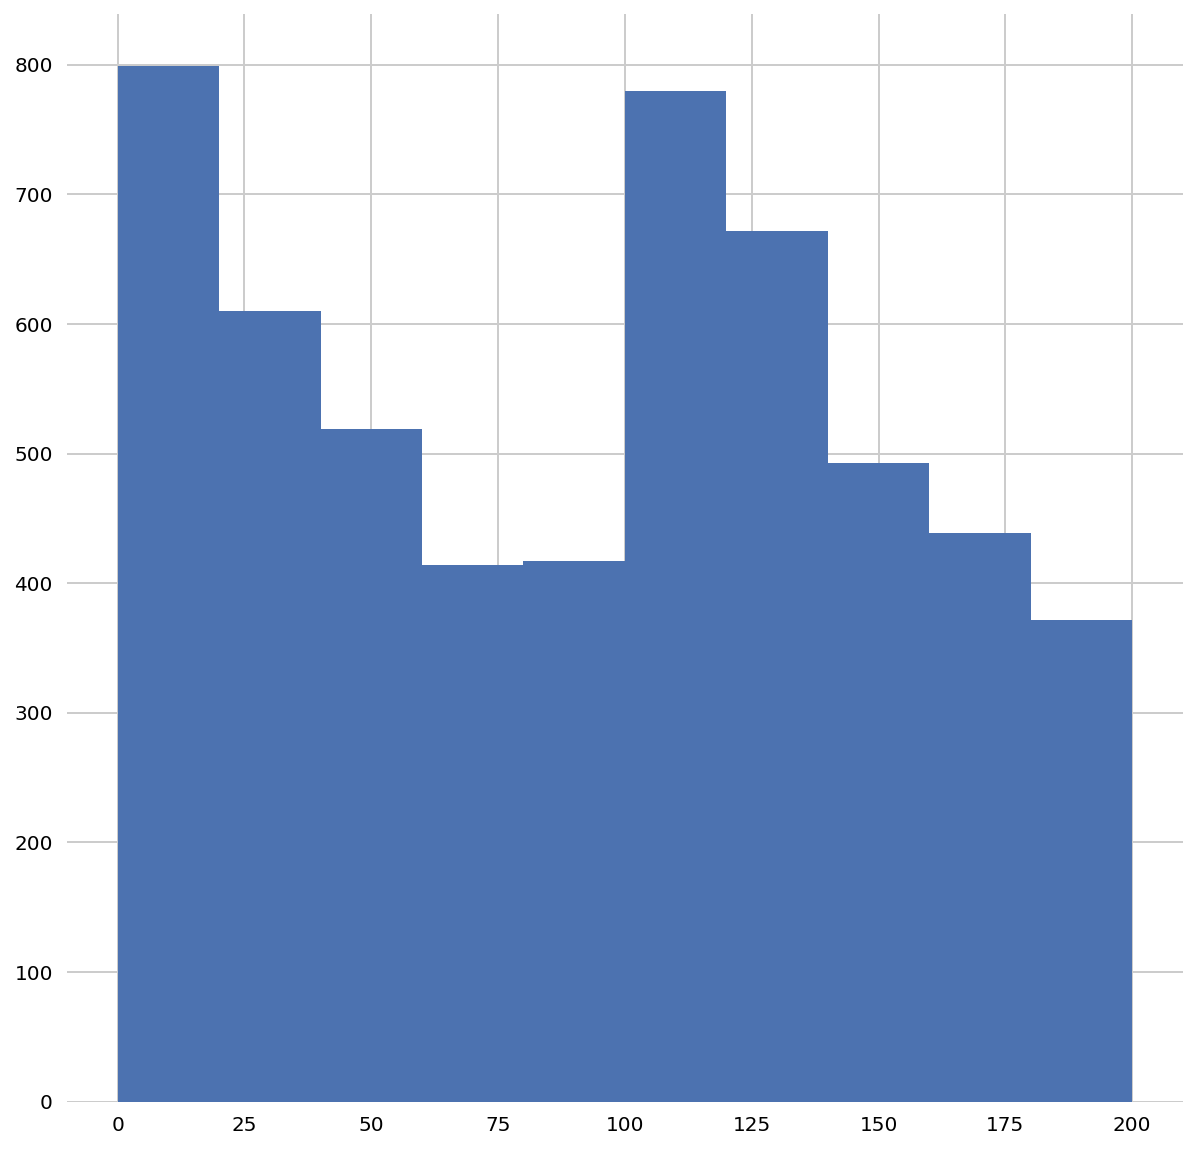

In [18]:
import matplotlib
# x-axis is the review_body_length
# y-axis is teh number of reviews
matplotlib.pyplot.hist(df['review_body_length'], bins=10,
                       range=[0,200],
                       density=False,
                       weights=None,
                       cumulative=False,
                       bottom=None,
                       histtype='bar',
                       align='mid',
                       orientation='vertical',
                       rwidth=None,
                       log=False,
                       color=None,
                       label=None,
                       stacked=False
                      )

# TODO:  Possibly use this HISTOGRAM() function in Presto - or equivalent (ie. WIDTH_BUCKET, etc)

In [19]:
# SQL statement
statement = """
SELECT HISTOGRAM(LENGTH(review_body)) as review_body_length_histo
FROM {}.{}
TABLESAMPLE BERNOULLI(10)
LIMIT 10000
""".format(database_name, table_name)

print(statement)


SELECT HISTOGRAM(LENGTH(review_body)) as review_body_length_histo
FROM dsoaws.amazon_reviews_parquet
TABLESAMPLE BERNOULLI(10)
LIMIT 10000



In [20]:
cursor = connect(region_name=region_name, s3_staging_dir=s3_staging_dir).cursor()
cursor.execute(statement)

# Load query results into Pandas DataFrame and show results
df = as_pandas(cursor)

In [21]:
histo_dict = eval(df.values[0][0].replace('=', ':'))

In [23]:
df_histo = pd.DataFrame.from_dict(histo_dict)

ValueError: If using all scalar values, you must pass an index